In [1]:
import nbpresent
nbpresent.__version__

'3.0.2'

# Introduction

This is the final capstone project for the Intro to Machine Learning Pro Intensive on CodeAcademy.com. For this final project we are working with a data from OKCupip which consist of profile information from its registrants. 

After some analysis of the dataset I was curious about how I might be able to incorporate NLP with all of the text from the essay questions. Additionally, I was curious about what people on OKCupid might really be looking for; casual encounters or long term partnership. Finally, I was also interested in how we might be able to determine income from the profile, but that question had some interest and was much less interesting to me that my first question.

The rest of this document will walk you through my process and share my results while demonstrating some of what I learned in the course. 

# Imports & Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import numpy as np
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import time

#change disply settings for data
#max display width
pd.options.display.max_columns = 60
#max column width
pd.options.display.max_colwidth = 500

/Users/paulrichardson/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Load in the DataFrame

In [3]:
#Load in the DataFrame
df = pd.read_csv("profiles.csv")

# Data Exploration

In [4]:
#rows and colums of data
df.shape

print('Number of Rows: ', df.shape[0])
print('Number of Columns: ', df.shape[1])

#list all columns
print()
print('Our data consist of the following columns', list(df))

Number of Rows:  59946
Number of Columns:  31

Our data consist of the following columns ['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job', 'last_online', 'location', 'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks', 'status']


In [5]:
#investigate first 5 rows
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"about me:<br />\n<br />\ni would love to think that i was some some kind of intellectual:\neither the dumbest smart guy, or the smartest dumb guy. can't say i\ncan tell the difference. i love to talk about ideas and concepts. i\nforge odd metaphors instead of reciting cliches. like the\nsimularities between a friend of mine's house and an underwater\nsalt mine. my favorite word is salt by the way (weird choice i\nknow). to me most things in life are better as metaphors. i seek to\nmake mysel...","currently working as an international agent for a freight\nforwarding company. import, export, domestic you know the\nworks.<br />\nonline classes and trying to better myself in my free time. perhaps\na hours worth of a good book or a video game on a lazy sunday.","making people laugh.<br />\nranting about a good salting.<br />\nfinding simplicity in complexity, and complexity in simplicity.","the way i look. i am a six foot half asian, half caucasian mutt. it\nmakes it tough not to notice me, and for me to blend in.","books:<br />\nabsurdistan, the republic, of mice and men (only book that made me\nwant to cry), catcher in the rye, the prince.<br />\n<br />\nmovies:<br />\ngladiator, operation valkyrie, the producers, down periscope.<br />\n<br />\nshows:<br />\nthe borgia, arrested development, game of thrones, monty\npython<br />\n<br />\nmusic:<br />\naesop rock, hail mary mallon, george thorogood and the delaware\ndestroyers, felt<br />\n<br />\nfood:<br />\ni'm down for anything.",food.<br />\nwater.<br />\ncell phone.<br />\nshelter.,duality and humorous things,trying to find someone to hang out with. i am down for anything\nexcept a club.,i am new to california and looking for someone to wisper my secrets\nto.,you want to be swept off your feet!<br />\nyou are tired of the norm.<br />\nyou want to catch a coffee or a bite.<br />\nor if you want to talk philosophy.,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1. i am a workaholic.<br />\n2. i love to cook regardless of whether i am at work.<br />\n3. i love to drink and eat foods that are probably really bad for\nme.<br />\n4. i love being around people that resemble line 1-3.<br />\ni love the outdoors and i am an avid skier. if its snowing i will\nbe in tahoe at the very least. i am a very confident and friendly.\ni'm not interested in acting or being a typical guy. i have no time\nor patience for re...,dedicating everyday to being an unbelievable badass.,being silly. having ridiculous amonts of fun wherever. being a\nsmart ass. ohh and i can cook. ;),NaN,i am die hard christopher moore fan. i don't really watch a lot of\ntv unless there is humor involved. i am kind of stuck on 90's\nalternative music. i am pretty much a fan of everything though... i\ndo need to draw a line at most types of electronica.,delicious porkness in all of its glories.<br />\nmy big ass doughboy's sinking into 15 new inches.<br />\nmy overly resilient liver.<br />\na good sharp knife.<br />\nmy ps3... it plays blurays too. ;)<br />\nmy over the top energy and my outlook on life... just give me a bag\nof lemons and see what happens. ;),NaN,NaN,i am very open and will share just about anything.,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,

In [6]:
#column types / null values
#indicates that most rows have some null values excepts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
age            59946 non-null int64
body_type      54650 non-null object
diet           35551 non-null object
drinks         56961 non-null object
drugs          45866 non-null object
education      53318 non-null object
essay0         54458 non-null object
essay1         52374 non-null object
essay2         50308 non-null object
essay3         48470 non-null object
essay4         49409 non-null object
essay5         49096 non-null object
essay6         46175 non-null object
essay7         47495 non-null object
essay8         40721 non-null object
essay9         47343 non-null object
ethnicity      54266 non-null object
height         59943 non-null float64
income         59946 non-null int64
job            51748 non-null object
last_online    59946 non-null object
location       59946 non-null object
offspring      24385 non-null object
orientation    59946 non-null object
pets

In [7]:
df.status.value_counts()

single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64

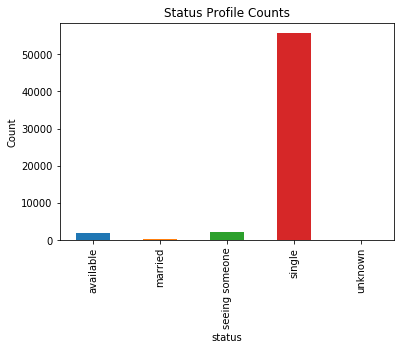

In [8]:
df_status_sex = df.groupby('status')['sex'].count()
df_status_sex
plt.ylabel('Count')
df_status_sex.plot(title='Status Profile Counts', kind='bar');
plt.savefig('profilestatus')

In [9]:
df.location.isnull().sum()

0

In [10]:
df.location.value_counts()

san francisco, california          31064
oakland, california                 7214
berkeley, california                4212
san mateo, california               1331
palo alto, california               1064
alameda, california                  910
san rafael, california               755
hayward, california                  747
emeryville, california               738
redwood city, california             693
daly city, california                681
san leandro, california              651
walnut creek, california             644
vallejo, california                  558
menlo park, california               479
richmond, california                 424
south san francisco, california      416
mountain view, california            384
novato, california                   369
burlingame, california               361
pleasant hill, california            347
castro valley, california            345
stanford, california                 341
el cerrito, california               325
pacifica, califo

#### Split the location to location_1 and location_2 to seperate city & state
- split location by ',' into two columns
- location_1 is generally a city with just a couple oulier counties
- location_2 is generally a state with just a couple oulier counties

In [11]:
df_location = df["location"].str.split(',',1, expand=True).rename(columns=lambda x: f"location_{x+1}")

In [12]:
df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 2 columns):
location_1    59946 non-null object
location_2    59946 non-null object
dtypes: object(2)
memory usage: 936.7+ KB


In [13]:
#add sex to location data
df_location["sex"] = df['sex'].astype(str)

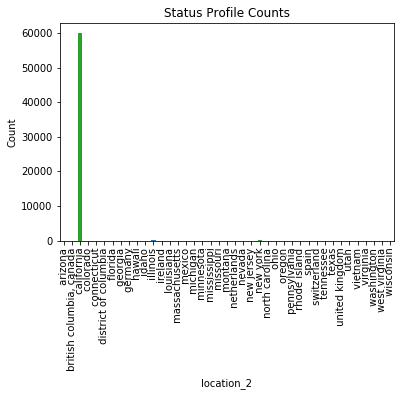

In [14]:
#bar chart of location of the OK Cupid profiles
df_location_sex = df_location.groupby('location_2')['sex'].count()
plt.ylabel('Count')
df_location_sex.plot(title='Status Profile Counts', kind='bar');
plt.savefig('location')

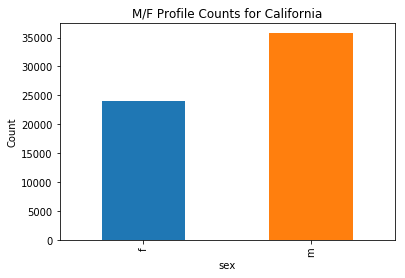

In [15]:
df_location_cali = df_location[df_location['location_2'].str.contains('california')]

#bar chart of location of the OK Cupid profiles
df_location_cali = df_location_cali.groupby('sex')['sex'].count()
plt.ylabel('Count')
df_location_cali.plot(title='M/F Profile Counts for California', kind='bar');
plt.savefig('sex')

In [16]:
#value counts of offspring
df.offspring.value_counts()

doesn&rsquo;t have kids                                7560
doesn&rsquo;t have kids, but might want them           3875
doesn&rsquo;t have kids, but wants them                3565
doesn&rsquo;t want kids                                2927
has kids                                               1883
has a kid                                              1881
doesn&rsquo;t have kids, and doesn&rsquo;t want any    1132
has kids, but doesn&rsquo;t want more                   442
has a kid, but doesn&rsquo;t want more                  275
has a kid, and might want more                          231
wants kids                                              225
might want kids                                         182
has kids, and might want more                           115
has a kid, and wants more                                71
has kids, and wants more                                 21
Name: offspring, dtype: int64

In [17]:
#clean up html code in string
df.offspring = df['offspring'].replace('&rsquo;','', regex=True)

In [18]:
#validate cleanup
print(df.offspring.value_counts())

doesnt have kids                         7560
doesnt have kids, but might want them    3875
doesnt have kids, but wants them         3565
doesnt want kids                         2927
has kids                                 1883
has a kid                                1881
doesnt have kids, and doesnt want any    1132
has kids, but doesnt want more            442
has a kid, but doesnt want more           275
has a kid, and might want more            231
wants kids                                225
might want kids                           182
has kids, and might want more             115
has a kid, and wants more                  71
has kids, and wants more                   21
Name: offspring, dtype: int64


#### Data Conversion: Offspring to Reason
- casual = Anyone who does not have kids and doesn't indicate that they want kids
- family = Anyone with kids who wants more kids
- partnership = Anyone with kids who may want more kids
- sexual = Anyone with no kids and doesn't want kids

To further refine my data I decided to group sexual and casual into a single group. I also grouped partnership and family into a single group. 

In [19]:
#offspring to reason mapping
df['reason'] = df.offspring.map({"doesnt have kids": 'casual', 
                              "doesnt have kids, but might want them": 'partnership',
                              "doesnt have kids, but wants them": 'family',
                              "doesnt want kids": 'sexual',
                              "has kids": 'partnership', 
                              "has a kid": 'partnership', 
                              "doesnt have kids, and doesnt want any": 'sexual', 
                              "has kids, but doesnt want more": 'partnership', 
                              "has a kid, and might want more": 'family', 
                              "wants kids": 'family',
                              "might want kids": 'partnership',
                              "has a kid, and might want more": 'partnership', 
                              "has a kid, and wants more": 'family', 
                              "has kids, and wants more": 'family',
                              "has kids, and might want more": 'partnership',
                              "has a kid, but doesnt want more": 'partnership'})

In [20]:
df.offspring.value_counts()
df.reason.value_counts()

partnership    8884
casual         7560
sexual         4059
family         3882
Name: reason, dtype: int64

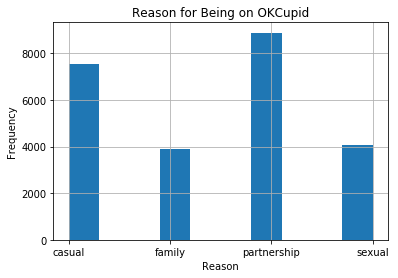

In [21]:
#create histogram
df.reason.hist();
plt.title("Reason for Being on OKCupid")
plt.xlabel('Reason')
plt.ylabel("Frequency")
plt.savefig('partnership')
plt.show()

In [22]:
#offspring to reason mapping
df['reason'] = df.offspring.map({"doesnt have kids": 'casual', 
                              "doesnt have kids, but might want them": 'partnership',
                              "doesnt have kids, but wants them": 'partnership',
                              "doesnt want kids": 'casual',
                              "has kids": 'partnership', 
                              "has a kid": 'partnership', 
                              "doesnt have kids, and doesnt want any": 'casual', 
                              "has kids, but doesnt want more": 'partnership', 
                              "has a kid, and might want more": 'partnership', 
                              "wants kids": 'partnership',
                              "might want kids": 'partnership',
                              "has a kid, and might want more": 'partnership', 
                              "has a kid, and wants more": 'partnership', 
                              "has kids, and wants more": 'partnership',
                              "has kids, and might want more": 'partnership',
                              "has a kid, but doesnt want more": 'partnership'})

In [23]:
df.offspring.value_counts()
df.reason.value_counts()

partnership    12766
casual         11619
Name: reason, dtype: int64

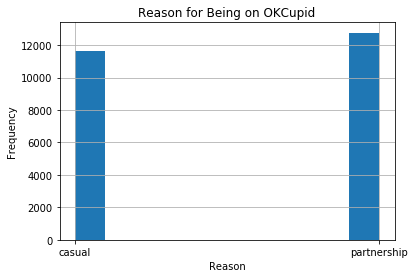

In [24]:
#create histogram / combined values into two groupings
df.reason.hist();
plt.title("Reason for Being on OKCupid")
plt.xlabel('Reason')
plt.ylabel("Frequency")
plt.savefig('profilestatusII')
plt.show()

# The Questions

After looking at this data I became very curious as to why people are on this dating website. I took a look at status and offspring and found that most people are single but there are many people with various thoughts on "offspring". After thinking about this a bit I classified offspring into a column called reason. In short based on a persons thoughts about wanting children or not I formulate a mapping for casual, family, partnership and sexual to categorize peoples aims or reason for being on OKCupid. I then grouped them into two groupings casual and partnership really to indicate those just seeking romatic encounters or are really unsure why they are on the site vs. those that have kids or really want kids, but don't want to go at it alone! 

### Question 1: Can I perdict the type of relationship or reason why someone is on OKCupid?

- Methods: KNN & SVM

### Question 2: Can I predict the income for a given profile?

The second questions is less interesting but necessary to complete the homework. Can I predict the income someone based on most of the same factors used to determine the reason they are on OKCupid?

- Methods: Linear Regression & KNN Regression

# Data Preperation 

To answer my question I will
-  Calucatate sentiment score for essay question 0 and 1 as they tend to pierce the pshcy a bit
-  I will use my logical mapping of offspring to reason code
-  I will map categorical into numerical data to satisfy the project requirements 
-  age, sex, status, income will be used as is for my analysis
-  I will remove nulls, duplicates and normalize my data for classification and regression

In [25]:
#copy data and columns needed for analysis
df_ml = df[["age", "sex", "status", "drugs", "reason","essay0", "essay1"]].copy()

#### The original dataset had 59946 records. After dropping the null/na records we are left with 16220 records after clean up.

In [26]:
# This is the code for clean up and validation of removing null/na values
#Row count
df_ml.shape

(59946, 7)

In [27]:
#drop na values
df_ml.dropna(inplace=True)
#drop duplicate values (there were none)
df_ml.drop_duplicates(inplace=True)
#count rows
df_ml.shape

(16220, 7)

### Prepare Essay questions and get VADER compound sentiment score for Positive or Negative Sentiment

To get NLP scores for the essay questions I chose to use the VADER compound score. To do this I..
- cleaned up all of the html code in the essays
- used the VADER sentiment analyer
- captured the results and added to my dataframe

#### Clean up html code in the essay questions 

In [28]:
# Removing the hmtl code
df_ml['essay0'] = df_ml['essay0'].replace('[^A-Za-z0-9]+',' ', regex=True)
df_ml['essay1'] = df_ml['essay1'].replace('[^A-Za-z0-9]+',' ', regex=True)

#### Get vader compound score for sentiment

In [29]:
compval0= []
compval1= []

In [30]:
start_time = time.time()

sid = SentimentIntensityAnalyzer()
i = 0 #counter
while (i<len(df_ml.essay0)):
    #essay0 score
    ss0  = sid.polarity_scores(df_ml.iloc[i]['essay0'])
    #append to list
    compval0.append(ss0['compound'])
    #essay1 score
    ss1  = sid.polarity_scores(df_ml.iloc[i]['essay1'])
    #append to list
    compval1.append(ss1['compound'])
    i += 1

print("--- Time to run code: %s seconds ---" % (time.time() - start_time))

--- Time to run code: 49.31493902206421 seconds ---


In [31]:
#convert to np array
compval00 = np.array(compval0)
compval11 = np.array(compval1)

In [32]:
#add to df_ml
df_ml['essay0'] = compval00
df_ml['essay1'] = compval11

In [33]:
df_ml.head()

,age,sex,status,drugs,reason,essay0,essay1
0,22,m,single,never,partnership,0.9916,0.8176
1,35,m,single,sometimes,partnership,0.9794,0.0516
17,26,f,single,never,casual,0.9049,-0.4019
19,33,m,single,never,casual,0.9963,0.9371
21,22,f,single,never,partnership,0.8720,0.9142


In [34]:

#drop offspring column
#df_ml = df_ml.drop(['offspring'], axis=1)

df_ml[df_ml.isnull().any(axis=1)]

,age,sex,status,drugs,reason,essay0,essay1


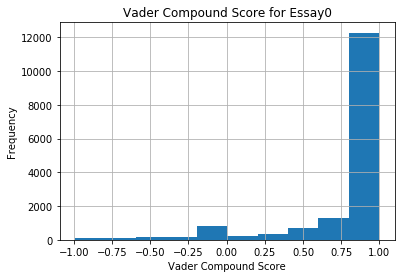

In [35]:
#create histogram
df_ml.essay0.hist();
plt.title("Vader Compound Score for Essay0")
plt.xlabel('Vader Compound Score')
plt.ylabel("Frequency")
plt.show()

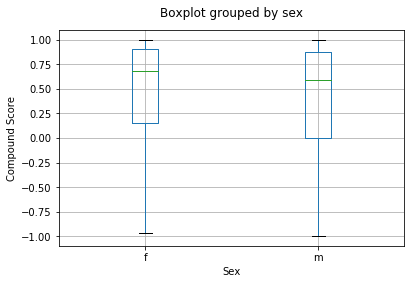

In [36]:
#create histogram
df_ml.boxplot(column=['essay1'], by=['sex']);
plt.title("Vader Compound Score for Essay1")
plt.xlabel('Sex')
plt.ylabel("Compound Score")
plt.title('')
plt.show()

# Map categorical data to numerical

- I mapped reason, drug and sex into numerical codes for my anlysis

### Create numerical columns from categorical "reason" column

In [37]:
# Create numerical columns from categorical "reason" column
df_ml['reason_code'] = df_ml.reason.map({"casual": 0, "partnership": 1})

### Create numerical columns from categorical "drug" column

In [38]:
# Create numerical columns from categorical "drug" column
df_ml['drug_code'] = df_ml.drugs.map({"never": 0, "sometimes": 1, "often": 2})

In [39]:
#drop drugs column
df_ml = df_ml.drop(['drugs'], axis=1)

### Create numerical columns from categorical "sex" column

In [40]:
# Create numerical columns from categorical "sex" column
df_ml['sex_code'] = df_ml.sex.map({"f": 0, "m": 1})

In [41]:
#drop drugs column
df_ml = df_ml.drop(['sex'], axis=1)

In [42]:
df_ml.head()

,age,status,reason,essay0,essay1,reason_code,drug_code,sex_code
0,22,single,partnership,0.9916,0.8176,1,0,1
1,35,single,partnership,0.9794,0.0516,1,1,1
17,26,single,casual,0.9049,-0.4019,0,0,0
19,33,single,casual,0.9963,0.9371,0,0,1
21,22,single,partnership,0.8720,0.9142,1,0,0


### Normalize the numerical data

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
start_time = time.time()

#identify and create feature list
feature_data = df_ml[['age', 'drug_code', 'sex_code']]

#set x to feature values
x = feature_data.values
#initialize MinMaxScaler
min_max_scaler = MinMaxScaler()
#scale/fit data to x_scaled variable
x_scaled = min_max_scaler.fit_transform(x)

#add scaled data to feature list
feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)

print("--- Time to run code: %s seconds ---" % (time.time() - start_time))

--- Time to run code: 0.003171205520629883 seconds ---


/Users/paulrichardson/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [45]:
#add features to the feature data list
feature_data['reason_code']= np.array(df_ml['reason_code'])
feature_data['essay0']= np.array(df_ml['essay0'])
feature_data['essay1']= np.array(df_ml['essay1'])

In [46]:
#check for null values
feature_data[feature_data.isnull().any(axis=1)]

,age,drug_code,sex_code,reason_code,essay0,essay1


In [47]:
#review the data
feature_data.head()

,age,drug_code,sex_code,reason_code,essay0,essay1
0,0.078431,0.0,1.0,1,0.9916,0.8176
1,0.333333,0.5,1.0,1,0.9794,0.0516
2,0.156863,0.0,0.0,0,0.9049,-0.4019
3,0.294118,0.0,1.0,0,0.9963,0.9371
4,0.078431,0.0,0.0,1,0.8720,0.9142


### Question 1: Can I perdict the type of relationship or reason why someone is on OKCupid?

# Classification Techniques

#### K-Nearest Neighbors

In [48]:
#data set and target variables
profiles = feature_data.drop(['reason_code'], axis=1)
labels = feature_data['reason_code']

In [49]:
#validate data
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16220 entries, 0 to 16219
Data columns (total 5 columns):
age          16220 non-null float64
drug_code    16220 non-null float64
sex_code     16220 non-null float64
essay0       16220 non-null float64
essay1       16220 non-null float64
dtypes: float64(5)
memory usage: 633.7 KB


In [50]:
#import 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [51]:
training_data, validation_data, training_labels, validation_labels = train_test_split(
    profiles, labels, test_size = 0.2, random_state = 100 )

In [52]:
#training data and labels should be equal
len(training_data) == len(training_labels)

True

In [53]:
#set range of k values
k_list = range(1, 101)
#list to capture accuracy values
accuracies = []

In [54]:
start_time = time.time()

#loop through 100 k values to test classier for KNN approach
for k in range(1, 101):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(training_data, training_labels)
    accuracies.append(classifier.score(validation_data, validation_labels))   
    
print("--- Time to run code: %s seconds ---" % (time.time() - start_time))

--- Time to run code: 14.02603816986084 seconds ---


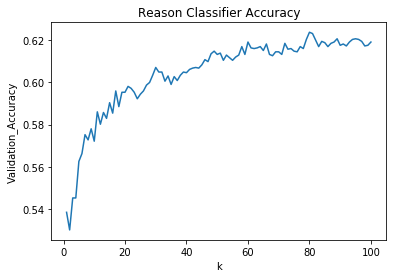

In [55]:
#plot the k values and accuracies
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation_Accuracy")
plt.title("Reason Classifier Accuracy")
plt.show()

In [56]:
classifier = KNeighborsClassifier(n_neighbors=35)
classifier.fit(training_data, training_labels)
predict = classifier.predict(validation_data)

In [57]:
#At K=35
print('Accuracy:', accuracy_score(validation_labels, predict))
print('Percision:', precision_score(validation_labels, predict))
print('Recall:', recall_score(validation_labels, predict))

Accuracy: 0.598951911221
Percision: 0.611282051282
Recall: 0.687031700288


# Result: KNN

I ran through a couple varations of this and increased my results from 30% to about 60%. I thought this was an interesting results. I would further this by analyzing all of the essay questions and continuing to identify how sentiment may identify the "reason" why someone is on the OKCupid site. 


### Search Vector Machine 

In [58]:
#import SVC from sklearn
from sklearn.svm import SVC

In [59]:
start_time = time.time()

# declair classifier, fit, validate score for train and validation data & labels
svm_classifier = SVC(kernel = 'rbf', gamma = 0.5, C = 2)
svm_classifier.fit(training_data, training_labels)
print('Classifier Score:', classifier.score(validation_data, validation_labels))   
print('Classifier Score:', classifier.score(training_data, training_labels))  

print("--- Time to run code: %s seconds ---" % (time.time() - start_time))

Classifier Score: 0.598951911221
Classifier Score: 0.628467940814
--- Time to run code: 7.887718915939331 seconds ---


In [60]:
#predict with model
predict = svm_classifier.predict(validation_data)

In [61]:
#accuracy, precision, recall
print('Accuracy:', accuracy_score(validation_labels, predict))
print('Percision:', precision_score(validation_labels, predict))
print('Recall:', recall_score(validation_labels, predict))

Accuracy: 0.603884093711
Percision: 0.599734042553
Recall: 0.779827089337


# Result: SVM

This result mirrored the results from the KNN tests. 

### Question 2: Can I predict the income for a given profile?

### Linear Regression

In [62]:
#Copy of ML data to add income
df_mlr = df_ml.copy()

# Data Prep

- Added income to data
- dropped all NaN and duplicates
- limited income to any value greater than -1 and < 1000000 to remove records with no income and the outlier

In [63]:
#prep data 
#add income
df_mlr['income'] = df['income']

#drop na values
df_mlr.dropna(inplace=True)
#drop duplicate values (there were none)
df_mlr.drop_duplicates(inplace=True)
#count rows
print(df_mlr.shape)

df_mlr = df_mlr.query('income > -1 and income < 1000000')
print(df_mlr.shape)

(16131, 9)
(3950, 9)


In [64]:
#import
from sklearn.linear_model import LinearRegression

In [65]:
#identify and create feature list
feature_data = df_mlr[['age', 'drug_code', 'sex_code', 'reason_code']]

In [66]:
#set x to feature values
x = feature_data.values
#initialize MinMaxScaler
min_max_scaler = MinMaxScaler()
#scale/fit data to x_scaled variable
x_scaled = min_max_scaler.fit_transform(x)

#add scaled data to feature list
feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)


/Users/paulrichardson/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [67]:
#add features to the feature data list
feature_data['essay0']= np.array(df_mlr['essay0'])
feature_data['essay1']= np.array(df_mlr['essay1'])

In [68]:
#check for null values
feature_data[feature_data.isnull().any(axis=1)]

,age,drug_code,sex_code,reason_code,essay0,essay1


In [69]:
#review the data
feature_data.head()

,age,drug_code,sex_code,reason_code,essay0,essay1
0,0.333333,0.5,1.0,1.0,0.9794,0.0516
1,0.333333,0.5,1.0,1.0,0.9908,0.1010
2,0.254902,0.0,0.0,1.0,0.9517,0.8591
3,0.215686,0.5,1.0,0.0,0.9011,0.0000
4,0.098039,0.0,0.0,1.0,0.9969,0.5423


In [70]:
#set profiles and labels for model
profiles = feature_data
labels = df_mlr['income']

In [71]:
#train test split for data
training_data, validation_data, training_labels, validation_labels = train_test_split(
    profiles, labels, test_size = 0.2, random_state = 100 )

In [72]:
#inialize regression, fit and score 
start_time = time.time()

regressor = LinearRegression()
regressor.fit(training_data, training_labels)
#score training
print('Training data Score: ', regressor.score(training_data, training_labels))
#score validation
print('Validation data Score: ', regressor.score(validation_data, validation_labels)) 
start_time = time.time()
print("--- Time to run code: %s seconds ---" % (time.time() - start_time))

Training data Score:  0.136890792608
Validation data Score:  0.0686545576644
--- Time to run code: 9.608268737792969e-05 seconds ---


In [73]:
#predict with model
predict = regressor.predict(validation_data)

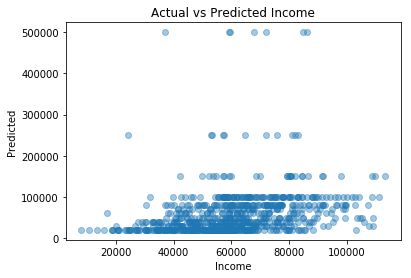

In [74]:
#scatter
plt.scatter(predict,validation_labels,alpha=0.4)
plt.xlabel("Income")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Income")
plt.show()

### KNN Regression

In [75]:
from sklearn.neighbors import KNeighborsRegressor

start_time = time.time()

regressor = KNeighborsRegressor(n_neighbors = 35,  weights = "distance")
regressor.fit(training_data, training_labels)
print('Training data Score: ', regressor.score(training_data, training_labels))
print('Validation data Score: ', regressor.score(validation_data, validation_labels)) 

print("--- Time to run code: %s seconds ---" % (time.time() - start_time))

Training data Score:  0.997821211383
Validation data Score:  0.0309083731044
--- Time to run code: 0.11292290687561035 seconds ---


In [76]:
predict = regressor.predict(validation_data)

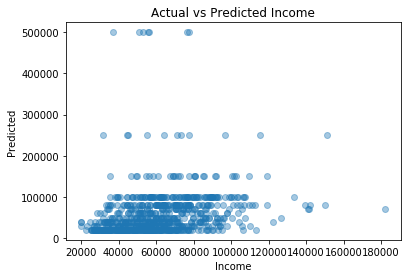

In [77]:
plt.scatter(predict,validation_labels,alpha=0.4)
plt.xlabel("Income")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Income")
plt.show()

# Result
The result from my regression tests were terrible. However, I don't believe the income data was suffcient nor did I pick the best columns for this method. If had a bit more time I could dig into this a lot more however I do not believe the income data was very good for this data set based on the relative few records available. 